# Одномерная оптимизация. Метод Ньютона

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Задача 17.79.** Убедившиь в выпуклости функции $f(x) = \frac{x^2}{2} - \cos x$ на отрезке $[0,3]$, найти её точку минимума $x^*$ и минимальное значение $f^*$ методом Ньютона. Критерием достижения требуемой точности считать выполнение неравенства $|f'(x_n)| \leq 10^{-6}$

In [2]:
def f(x):
    return x ** 2 / 2 - np.cos(x)

# производная
def df(x):
    return x - np.sin(x)

# вторая производная
def d2f(x):
    return 1 - np.cos(x)

### Убедимя в выпуклоти $f(x)$ на отрезке $[0,3]$

In [3]:
a = 0
b = 3
is_convex = True  # Предположим, что функция выпукла

for xi in np.linspace(a, b, 100):
    h = 1e-6
    df2 = (f(xi + h) - 2 * f(xi) + f(xi - h)) / h**2 # вторая производная
    
    if df2 < 0:
        is_convex = False
        break

if is_convex:
    print(f'Функция выпукла на отрезке [{a}, {b}]')
else:
    print(f'Функция не является выпуклой на отрезке [{a}, {b}]')

Функция выпукла на отрезке [0, 3]


### Метод Ньютона

Нашей целью является поиск решения уравнения $f'(x) = 0$. Можно решать эту задачу так: 

1. Задаем $x_0$
2. Проводим в этой точке касательную к функции $f'(x)$, находим точку $x_1$ пересечения этой касательной с осью $Ox$. Ордината точек касательной описывается уравнением: $f'(x_k) + f''(x_k)(x - x_k)$, поэтому приравняв это выражение к нулю, найдем $x_{k+1}$: 

    $x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$

3. Продолжаем процедуру до тех пор пока не выполнится критерий остановки $|f'(x_k)| \leq \varepsilon$, для некоторого положительного $\varepsilon$


In [4]:
def Newton_method(x0, eps, df, d2f):

    k = 0
    x_values = [x0]  # Для хранения значений x на каждой итерации
    y_values = [df(x0)]  # Для хранения значений производной на каждой итерации
    
    while abs(df(x0)) > eps:
        
        k += 1
        
        x1 = x0  - df(x0) / d2f(x0)
        x0 = x1
        
        x_values.append(x0)
        y_values.append(df(x0))
        
    return x0, k, x_values, y_values

In [5]:
eps = 1e-6
x0 = 5
x_min, k, x_values, y_values = Newton_method(x0, eps, df, d2f)

print('x0 =', x0)
print('x* =', x_min)
print('f* =', f(x_min))
print('k =', k, '\n')

x0 = 5
x* = -3.8142919056475836e-05
f* = -0.9999999985451178
k = 28 



### График $f'(x)$

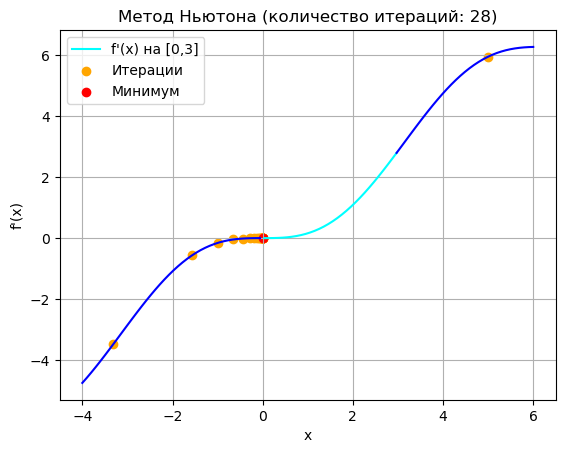

In [6]:
x = np.linspace(-4, 6, 100)
ddf = [df(xi) for xi in x]

plt.plot(x[:40], ddf[:40], color='blue')
plt.plot(x[40:70], ddf[40:70], color='aqua', label='f\'(x) на [0,3]')
plt.plot(x[69:], ddf[69:], color='blue')
plt.scatter(x_values[:-1], y_values[:-1], color='orange', label='Итерации')
plt.scatter(x_values[-1], y_values[-1], color='red', label='Минимум')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.title(f'Метод Ньютона (количество итераций: {k})')
plt.grid()

### График $f(x)$

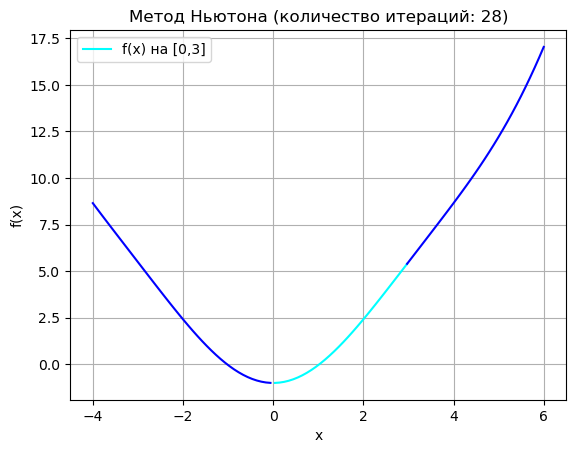

In [7]:
x = np.linspace(-4, 6, 100)
ff = [f(xi) for xi in x]

plt.plot(x[:40], ff[:40], color='blue')
plt.plot(x[40:70], ff[40:70], color='aqua', label='f(x) на [0,3]')
plt.plot(x[69:], ff[69:], color='blue')
# plt.scatter(x_values[:-1], y_values[:-1], color='orange', label='Итерации')
# plt.scatter(x_values[-1], y_values[-1], color='red', label='Минимум')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Метод Ньютона (количество итераций: {k})')
plt.grid()

In [8]:
min(f(x)) # наш реальный минимум

-0.9983676245551576

**Метод Ньютона чувствителен к выбору начальной точки, но в нашем примере всё хорошо, потому что на отрезке $[0,3]$ только один минимум.**

Метод Ньютона чувствителен к выбору начальной точки по нескольким причинам:

1. Метод Ньютона может сходиться к корню функции только в том случае, если начальная точка достаточно близка к корню. В противном случае метод может расходиться или сойтись к другому корню. Это связано с тем, что метод Ньютона основан на разложении функции в ряд Тейлора и предполагает, что функция является гладкой и близкой к квадратичной в окрестности корня.

2. В некоторых случаях метод Ньютона может сойтись к локальному минимуму или максимуму функции, а не к корню, если начальная точка выбрана неудачно.

3. В зависимости от начальной точки метод Ньютона может потребовать разное количество итераций для достижения заданной точности. Если начальная точка находится близко к корню, метод может быстро сойтись, но если начальная точка далеко от корня, то потребуется больше итераций.

x0 = -3.0
x* = -0.016755799047670508
f* = -0.9997192464825926
k = 12 

x0 = -1.0
x* = -0.016822797810868255
f* = -0.9997169968109787
k = 10 

x0 = -0.5
x* = -0.012908736275343655
f* = -0.9998333656847415
k = 9 

x0 = -0.25
x* = -0.014604579529828014
f* = -0.999786708152336
k = 7 

x0 = -0.1
x* = -0.013164842228783297
f* = -0.9998266881806432
k = 5 

x0 = 0.1
x* = 0.013164842228783297
f* = -0.9998266881806432
k = 5 

x0 = 0.25
x* = 0.014604579529828014
f* = -0.999786708152336
k = 7 

x0 = 0.5
x* = 0.012908736275343655
f* = -0.9998333656847415
k = 9 

x0 = 1.0
x* = 0.016822797810868255
f* = -0.9997169968109787
k = 10 

x0 = 3.0
x* = 0.016755799047670508
f* = -0.9997192464825926
k = 12 



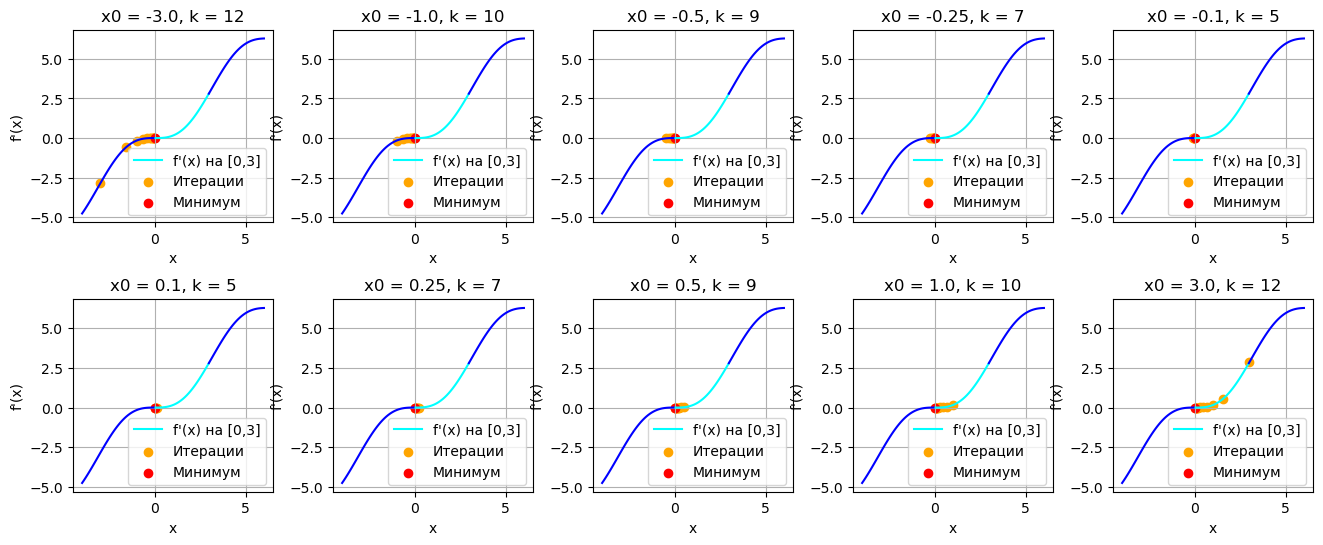

In [9]:
eps = 1e-6
x0 = np.array([-3, -1, -0.5, -0.25, -0.1, 0.1, 0.25, 0.5, 1, 3])

fig, axs = plt.subplots(2, 5, figsize=(16, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(len(x0)):
    x_min, k, x_values, y_values = Newton_method(x0[i], eps, df, d2f)
    
    x = np.linspace(-4, 6, 100)
    ddf = [df(xi) for xi in x]

    # Выбираем текущую подфигуру в сетке
    ax = axs[i // 5, i % 5]

    ax.plot(x[:40], ddf[:40], color='blue')
    ax.plot(x[40:70], ddf[40:70], color='aqua', label='f\'(x) на [0,3]')
    ax.plot(x[69:], ddf[69:], color='blue')
    ax.scatter(x_values[:-1], y_values[:-1], color='orange', label='Итерации')
    ax.scatter(x_values[-1], y_values[-1], color='red', label='Минимум')
    ax.set_xlabel('x')
    ax.set_ylabel('f\'(x)')
    ax.legend()
    ax.set_title(f'x0 = {x0[i]}, k = {k}')
    ax.grid()

    print('x0 =', x0[i])
    print('x* =', x_min)
    print('f* =', f(x_min))
    print('k =', k, '\n')

Мы можем заметить на графиках, что приближение к минимуму может проикодить как слева, так и справа, поэтому в различных примерах $x$ приближаетя к нулю справа или слева, но нуля не достигает из-за установленного $\varepsilon$. 

Еcли мы уcтановим $\varepsilon = 10^{-14}$, мы получим $x=0$

In [10]:
eps = 1e-14
x0 = 1
x_min, k, x_values, y_values = Newton_method(x0, eps, df, d2f)

print('x0 =', x0)
print('x* =', round(x_min, 4))
print('f* =', round(f(x_min), 4))
print('k =', k, '\n')

x0 = 1
x* = 0.0
f* = -1.0
k = 25 



$min(f(x)) = 1$ будет достигнуто уже при $\varepsilon = 10^{-8}$ ($f(0) = -1$ – минимум на отрезке $[0,3]$)

In [11]:
eps = 1e-8
x0 = 1
x_min, k, x_values, y_values = Newton_method(x0, eps, df, d2f)

print('x0 =', x0)
print('x* =', round(x_min, 4))
print('f* =', round(f(x_min), 4))
print('k =', k, '\n')

x0 = 1
x* = 0.0033
f* = -1.0
k = 14 

